# Creating Customer Segments

## Getting Started

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

%matplotlib inline

try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. We will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which we will track through the course of this project.

Let's run the code block below to observe a statistical description of the dataset. The dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, let's add **three** indices of our choice to the `indices` list which will represent the customers to track.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,2612,4339,3133,2088,820,985
2,1989,10690,19460,233,11577,2153


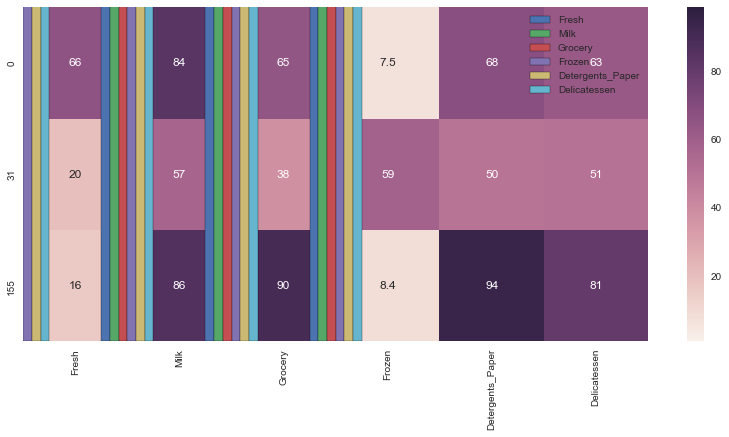

In [3]:
indices = [0,31,155]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

import seaborn as sns
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6))

percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

We can see that Customer 0 tends to buy fresh and healthy products such as fruit and vegetables as well as dairy products, whereas frozen products are not often in its shopping cart. We can compare the Fresh value of the customer 0 (12669) with the mean value of the fresh feature (12000) and see that the Customer 0 shops for fresh products more than average. The perfect place for the first customer would be classic retail store.

Customer 1 is shopping for dairy products and classic grocery items such as snack foods and cereals. We can see that this customer is most likely to shop in a regular retail store, as they do not buy detergents and delicatessen that often. We can prove that by comparing the Detergents_paper value of the customer 1 (820) and the mean (2881). Also the delicatessen value (985) is way below the mean (1524).

Customer 2 likes to buy dairy products, classic grocery items but also detergents. Frozen products are not bought much by this customer as the mean for Frozen products is 3071 and the customer 2 value is 233. Due to variety of the different things it tends to buy, the perfect place for this customer to shop is supermarket.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [4]:
target_feature = data['Grocery']
new_data = data.drop('Grocery', axis=1)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target_feature, test_size=0.25, random_state=42)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

score = regressor.score(X_test, y_test)

print score

0.681884008544


We attempted to predict 'Grocery' feature, and the reported prediction score is 0.68. So it is possible to predict the 'Grocery' feature but the accuracy is not perfect. It can be assumed that Grocery feature is not really necessary for identifying customers' spending habits because we can already predict it with a certain degree of accuracy with the current information we have.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data.

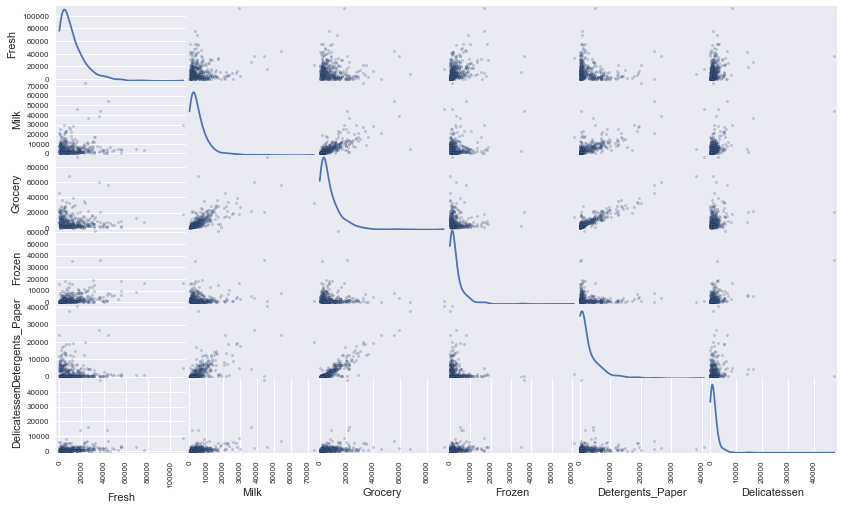

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

We can see that the pairs (Grocery, Milk) and (Grocery, Detergents_Paper) exhibit a certain degree of correlation. We can see that the features Milk and Detergents_Paper have also a certain degree of correlation which is smaller than the (Grocery, Milk) and (Grocery, Detergents_Paper) correlation degree. This is why the R^2 score could predict the Grocery feature to a certain degree. Other features do not show as much correlation as these pairs, and the R^2 score for them is negative. The graphs above confirm my suspicions about the irrelevance of the feature I attempted to predict, however we did not guess the relation between Grocery and Detergents_paper feature. The data for (Grocery,Milk) and (Grocery,Detergents_Paper) pairs is distributed linearly, and with applying PCA algorithm, we could transform these features in order to reduce dimensionality. When looking at individual feature distributions, they are skewed.

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

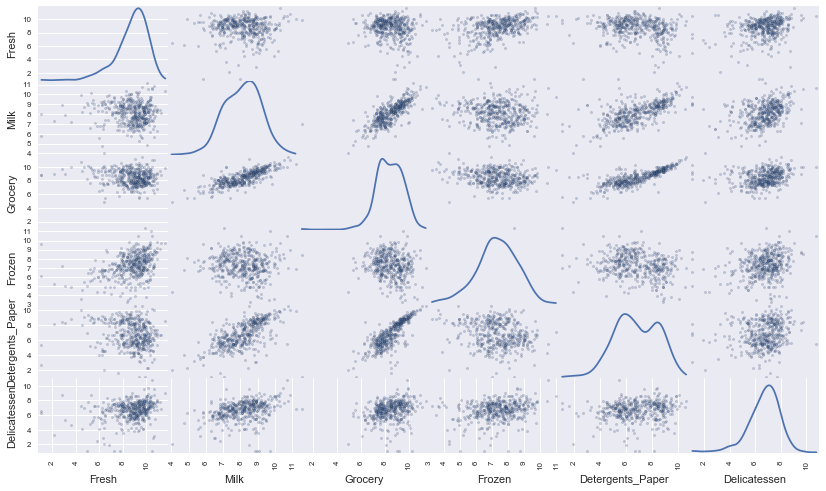

In [6]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature appears much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Let's run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,7.867871,8.375399,8.049746,7.643962,6.709304,6.892642
2,7.595387,9.277064,9.876116,5.451038,9.356776,7.674617


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [8]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Data point 65 is considered to be an outlier for the feature 'Fresh' and for the feature 'Frozen'.


Data point 66 is considered to be an outlier for the features 'Fresh' and 'Delicatessen'.


Data point 128 is considered to be an outlier for the features 'Fresh' and 'Delicatessen'.


Data point 154 is considered to be an outlier for the features 'Milk' and 'Grocery' and 'Delicatessen'.


Data point 75 is considered to be an outlier for the features 'Detergents_paper' and 'Grocery'.


We could remove them in order to make better predictions (although one data point will not probably influence our data as much, but we could remove more data points which are considered outliers in more features).

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone.

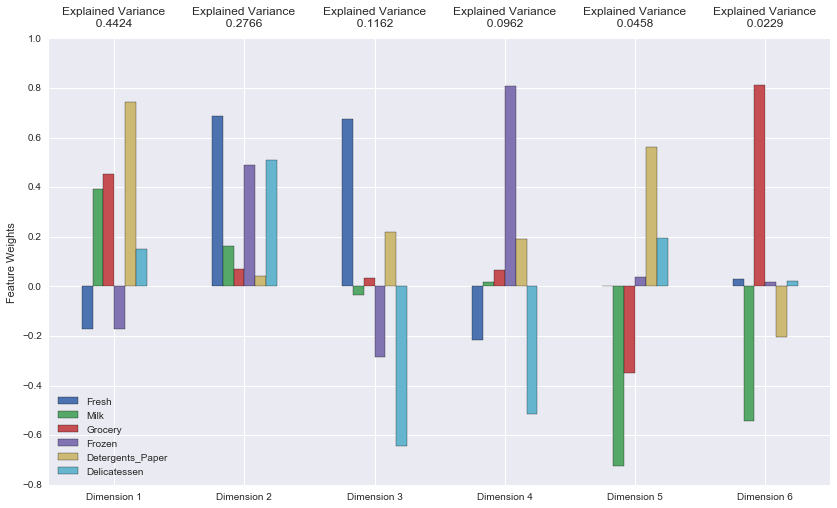

In [9]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
data_points, features = good_data.shape
pca = PCA(features)
pca.fit(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

For the first principal component, the explained variance is 0.4424 and for the second one, the value is 0.2766. Thus, in total it means that the explained variance is 0.719. The first four principal components explain 0.9314. The first four dimensions represent Detergents_Paper, Fresh, Frozen and Milk.
The first component puts weight on Detergents_paper, Grocery and Milk features. That looks like a supermarket.
The second component puts weight on Delicatessen, Frozen and Fresh products while not putting lots of weight on Detergents_paper and Grocery. This one is categorized best to some cafe or hotel etc.
The third component puts weight on Fresh products, retail store.
The fourth component puts most weight on Frozen products, while fresh products have negative weight, and could be supermarket.

### Observation
Let's run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. We will Observe the numerical value for the first four dimensions of the sample points and consider if this is consistent with our initial interpretation of the sample points.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7510,0.0705,0.9118,-1.7265,-0.2741,-0.3984
1,-0.0098,-0.2971,-0.8630,0.3091,-0.0346,-0.4553
2,3.6912,-0.7706,-0.3192,-1.1640,0.2440,-0.0228


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [11]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Let's run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions, and observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7510,0.0705
1,-0.0098,-0.2971
2,3.6912,-0.7706


## Clustering

In this section, we will choose to use a K-Means clustering algorithm to identify the various customer segments hidden in the data. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

K-Means clustering algorithm is one of the simplest approaches in unsupervised learning, but it works remarkably well. However, K-means is sensitive to noise and outliers and it can get stuck in local minimum. For the most part, we do not need a high quality clusters. Sometimes we just need to group the data points into a centroids to see a general behaviour

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In [13]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=2)
clusterer.fit(reduced_data)

preds = clusterer.predict(reduced_data)

centers = clusterer.cluster_centers_

sample_preds = clusterer.predict(pca_samples)

from sklearn import metrics
score = metrics.silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')

print score

0.419166083203


### Question 7
Let's test a different number of clusters. The silhouette score for them is the following:

2 clusters - 0.419,

3 clusters - 0.392,

4 clusters - 0.329,

5 clusters - 0.350,

8 clusters - 0.355,


We can see that when we use 2 clusters, we get the best score.

### Cluster Visualization
Once we've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, we can now visualize the results by executing the code block below.

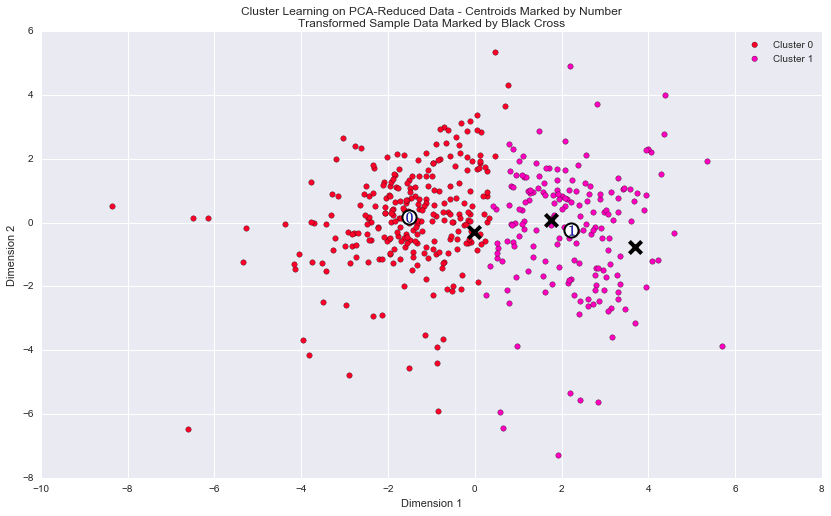

In [14]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8994.0,1909.0,2366.0,2081.0,290.0,681.0
Segment 1,3570.0,7749.0,12463.0,900.0,4567.0,966.0


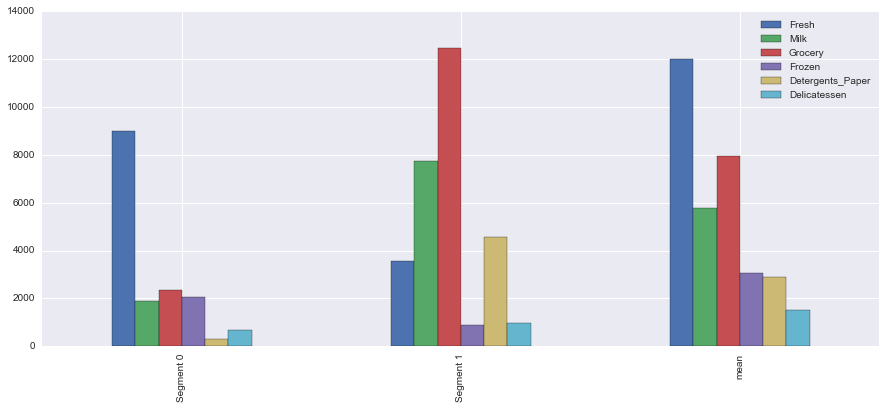

In [15]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

true_centers = true_centers.append(data.describe().loc['mean'])
_ = true_centers.plot(kind='bar', figsize=(15,6))

When comparing it to the mean, we can see that segment 0 puts weight on Grocery items, Milk and Detergents_paper.

Segment 1 puts most weight on Fresh products, although the fresh feature is below the mean, other features are way below. 

Segment 0 - relies on Grocery and dairy products (supermarket)

Segment 1 - relies on fresh products (organic retail store)

In [16]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
display(log_samples)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,7.867871,8.375399,8.049746,7.643962,6.709304,6.892642
2,7.595387,9.277064,9.876116,5.451038,9.356776,7.674617


If we compare Customer 0 features with the cluster centers above, we can assume that Customer 0 belongs to Cluster 0 because of the variety of different products which are present. (Grocery and Milk features are the most important in Cluster 0 and Customer 0 has pretty high values for those features. We can also see that Customer 0 does not buy lots of fresh products and in Cluster 0, fresh products value is really low, which confirms the statement).

If we compare Customer 1 features with the cluster centers above, we can assume that Customer 1 belongs to Cluster 0 because of the Fresh feature. However, the predictions says that it belongs to Cluster 1 because of all the other features which are below the mean and in Cluster 1 those values are also below the mean.

When comparing Customer 2 features, we can assume that it belongs to Cluster 0 because of the high Detergents_paper, Grocery and Milk values. In cluster 0, those values are higher than in cluster 1, so the prediction says that Customer 2 belongs to cluster 0

## Conclusion

In this final section, we will investigate ways that you can make use of the clustered data. First, we will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, we will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively.

The change will not affect all customers equally because some customers tend to buy fresh items, and if the delivery service changes from currently 5 days a week to 3 days a week, those customers will not have the fresh items they are looking for. So this change will affect those customers negatively. However, the other type of customers do not tend to buy that much fresh items, and the change will not affect them as much as it affected the first type of customers. We can run A/B test to see how making the change will affect the customers.
Let's look at one cluster at a time. We take a part of customers from one cluster and put them in experiment group, and we put the customers that are left into a control group. We do the same thing with the other cluster, we take a part of customers from the second cluster and put them in experiment group, leaving the others in a control group. Then we can try reducing delivery service from 5 days to 3 days a week and see how the sample customers behave. Thus, we can know whether we should apply this change to that cluster or not.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  

We can use supervised learner on our data and train it to be able to see the correlation between the features and clusters to which they belong. Then, when we have a new customer with its spending habits, with the help of supervised learning, we can predict which cluster that customer belongs to and we can know whether we should apply the delivery service rule or not.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Let's run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space.

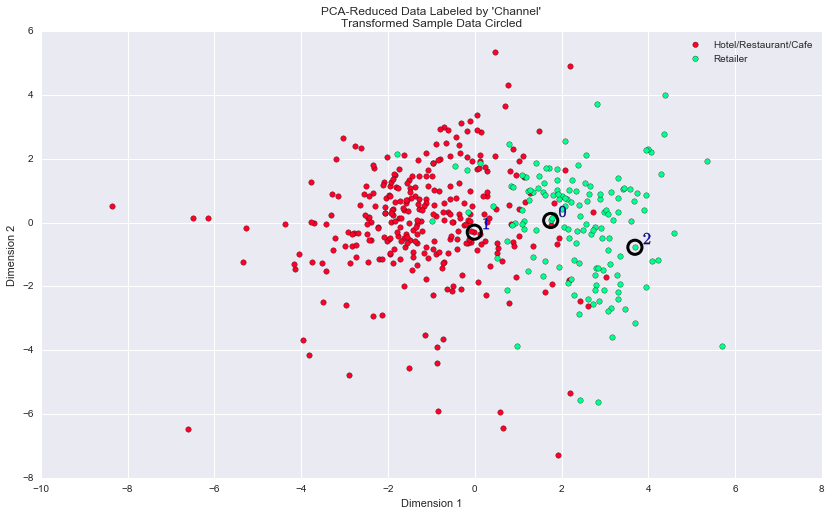

In [17]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

The clustering algorithm that we've chosen seems a good fit, as well as the number of clusters (2). There are data points that could be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes'. However, there are some of them which are not clear which cluster they belong to. I would consider these classifications as consistent with our previous definition of the customer segments